In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:

A = 106
C = 1283
M = 6075
I1 = 1

N = 1000

# Generate the sequence of random numbers Ij
def generate_random_numbers(N):
    I = np.zeros(N + 1)

    I[1] = I1
    for i in range(2, N + 1):
        I[i] = (A * I[i-1] + C) % M
    
    return I


# a) Plot Ij vs j for N = 1000

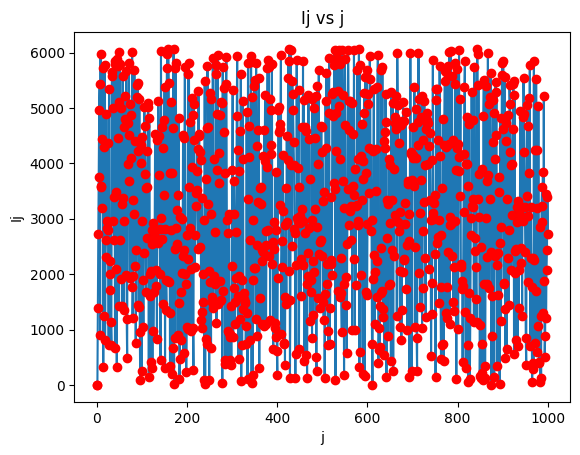

In [3]:

# plot Ij vs j with the points on red circles
I = generate_random_numbers(N)
plt.plot(I)
plt.plot(I, 'ro')
plt.xlabel('j')
plt.ylabel('Ij')
plt.title('Ij vs j')
plt.show()


# b) Plot Ij+1 vs Ij for N = 1000.

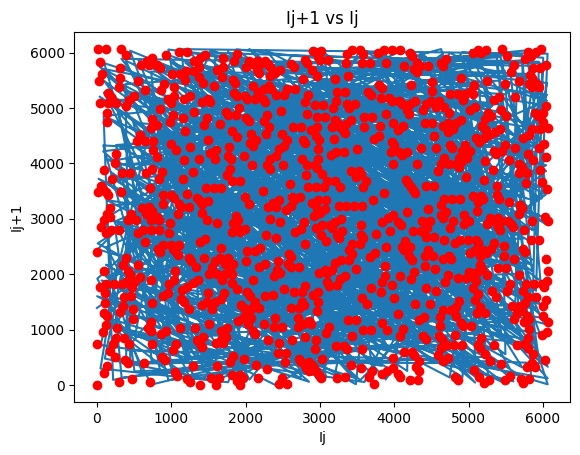

In [4]:
# plot Ij+1 vs Ij with the points on red circles
plt.plot(I[1:-2], I[2:-1])
plt.plot(I[1:], I[:-1], 'ro')
plt.xlabel('Ij')
plt.ylabel('Ij+1')
plt.title('Ij+1 vs Ij')
plt.show()

## We see an uniform distribution of points in the plot. We deduce that there is no correlation between Ij+1 and Ij. This implies that the pseudo-random variables generated are truly random.

# Plot the expectation value E(Ij) as a function of N. N = [1, 10, 50, 100, 200, 300,…., 1800, 1900, 2000].

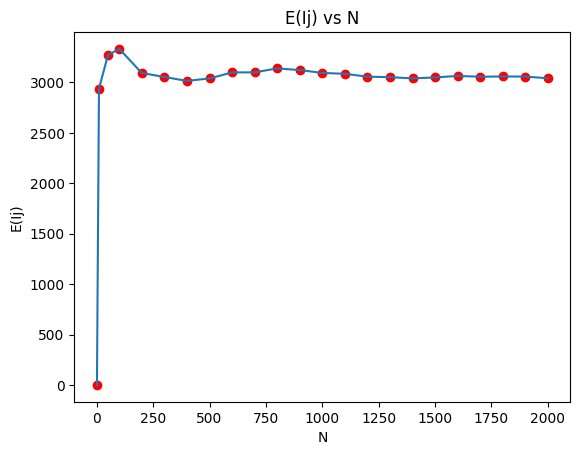

In [5]:
# Plot the expectation value E(Ij) as a function of N. N = [1, 10, 50, 100, 200, 300, …., 1800, 1900, 2000].
N = np.array([1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])
E = np.zeros(len(N))

for i in range(len(N)):
    I = generate_random_numbers(N[i])
    E[i] = np.mean(I)

plt.plot(N, E, 'ro')
plt.plot(N, E)
plt.xlabel('N')
plt.ylabel('E(Ij)')
plt.title('E(Ij) vs N')
plt.show()